In [52]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

from matplotlib.ticker import PercentFormatter



In [53]:
df = pd.read_csv("DSI_kickstarterscrape_dataset.csv", encoding = "ISO-8859-1") #delimiter=','

print(df.head())

   project id                                               name  \
0       39409                              WHILE THE TREES SLEEP   
1      126581               Educational Online Trading Card Game   
2      138119                                              STRUM   
3      237090  GETTING OVER - One son's search to finally kno...   
4      246101  The Launch of FlyeGrlRoyalty &quot;The New Nam...   

                                                 url      category  \
0  http://www.kickstarter.com/projects/emiliesaba...  Film & Video   
1  http://www.kickstarter.com/projects/972789543/...         Games   
2  http://www.kickstarter.com/projects/185476022/...  Film & Video   
3  http://www.kickstarter.com/projects/charnick/g...  Film & Video   
4  http://www.kickstarter.com/projects/flyegrlroy...       Fashion   

          subcategory         location      status     goal  pledged  \
0          Short Film     Columbia, MO  successful  10500.0  11545.0   
1  Board & Card Games    M

In [54]:
df.describe()


,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [55]:
#df['Day'] = df['funded date'].str.split(r", ", expand=True)
#print(df['Day'].head())

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

In [57]:
df.columns


Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [58]:
df.shape


(45957, 17)

In [59]:
df.pledged.mean()


4980.749678963979

In [60]:
df.goal.mean()

11942.709521509252

In [61]:
df.goal.median()

4000.0

In [62]:
df.pledged.median()


1310.0

In [63]:
df.pledged.max()

10266845.0

In [64]:
df.goal.max()

21474836.47

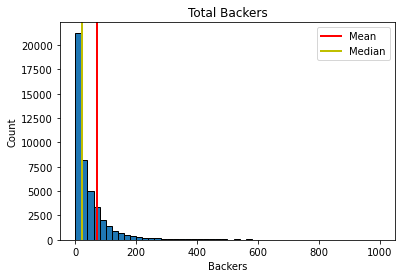

In [65]:
average = df.backers.mean()
median = df.backers.median()
outlier = df.backers.max()
backers = df.backers.values

plt.hist(backers,  range = (0, 1000), bins = 50, edgecolor='black')
plt.title("Total Backers")
plt.ylabel("Count")
plt.xlabel("Backers")
plt.axvline(average, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(median, color='y', linestyle='solid', linewidth=2, label="Median")
#plt.axvline(outlier, color='pink', linestyle='solid', linewidth=2, label='outlier')
plt.legend()

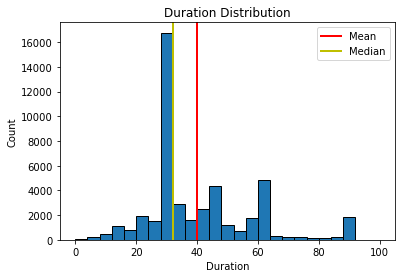

In [66]:
duration = df.duration.values
average1 = df.duration.mean()
median1 = df.duration.median()

plt.hist(duration,  range = (0, 100), bins = 25, edgecolor='black')
plt.title("Duration Distribution")
plt.ylabel("Count")
plt.xlabel("Duration")
plt.axvline(average1, color='r', linestyle='solid', linewidth=2, label="Mean")
plt.axvline(median1, color='y', linestyle='solid', linewidth=2, label="Median")
plt.legend()

In [67]:
df.duration.nunique()

5954

In [68]:
df.corr()


,project id,goal,pledged,funded percentage,backers,levels,updates,comments,duration
project id,1.000000,-0.006862,-0.001762,-0.004456,0.003878,-0.000822,-0.003015,-0.002917,0.002657
goal,-0.006862,1.000000,0.020919,-0.001022,0.028017,0.016494,-0.003265,0.029201,0.024514
pledged,-0.001762,0.020919,1.000000,0.008401,0.829452,0.070600,0.098482,0.554628,0.001281
funded percentage,-0.004456,-0.001022,0.008401,1.000000,0.005466,0.000213,0.015239,0.004800,-0.003164
backers,0.003878,0.028017,0.829452,0.005466,1.000000,0.077863,0.112467,0.695778,-0.006810
levels,-0.000822,0.016494,0.070600,0.000213,0.077863,1.000000,0.248861,0.089719,0.029563
updates,-0.003015,-0.003265,0.098482,0.015239,0.112467,0.248861,1.000000,0.103498,0.059566
comments,-0.002917,0.029201,0.554628,0.004800,0.695778,0.089719,0.103498,1.000000,-0.006642
duration,0.002657,0.024514,0.001281,-0.003164,-0.006810,0.029563,0.059566,-0.006642,1.000000


In [69]:
df.groupby(['category'])['status'].count().sort_values(ascending=False)
#df.groupby('category').size().sort_values()

category
Film &amp; Video    13053
Music               10913
Publishing           4770
Art                  3992
Theater              2492
Design               1768
Games                1738
Photography          1514
Food                 1439
Fashion              1136
Comics               1072
Technology            811
Dance                 761
Film & Video          498
Name: status, dtype: int64

In [70]:
df.groupby(df.loc[(df.status == 'successful'), 'category'])['category'].count()#.sort_values(ascending=False)

category
Art                 2106
Comics               520
Dance                527
Design               729
Fashion              335
Film & Video         246
Film &amp; Video    6177
Food                 655
Games                635
Music               6792
Photography          645
Publishing          1671
Technology           289
Theater             1642
Name: category, dtype: int64

In [71]:
'''g_c = df.groupby('status').count()
df.loc[df.status == 'successful','category'] = g_c['category']['successful']

print(g_c['category']['successful'])'''

"g_c = df.groupby('status').count()\ndf.loc[df.status == 'successful','category'] = g_c['category']['successful']\n\nprint(g_c['category']['successful'])"

In [72]:
#df.groupby([(df.status == 'successful'), 'category'])['category'].count()#.unstack('status')

In [73]:
df.groupby('category').status.count().sort_values(ascending=False).reset_index()

,category,status
0,Film &amp; Video,13053
1,Music,10913
2,Publishing,4770
3,Art,3992
4,Theater,2492
5,Design,1768
6,Games,1738
7,Photography,1514
8,Food,1439
9,Fashion,1136


In [74]:
successful_status = df[df.status =='successful']\
    .groupby('category')['status']\
    .count()\
    .sort_values(ascending=False)
    #.unstack()

successful_status


category
Music               6792
Film &amp; Video    6177
Art                 2106
Publishing          1671
Theater             1642
Design               729
Food                 655
Photography          645
Games                635
Dance                527
Comics               520
Fashion              335
Technology           289
Film & Video         246
Name: status, dtype: int64

In [75]:
df.status.values

array(['successful', 'failed', 'live', ..., 'successful', 'failed',
       'successful'], dtype=object)

In [76]:
#look at null values
df.isnull().sum()

project id              0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

In [77]:
df.category.value_counts()


Film &amp; Video    13053
Music               10913
Publishing           4770
Art                  3992
Theater              2492
Design               1768
Games                1738
Photography          1514
Food                 1439
Fashion              1136
Comics               1072
Technology            811
Dance                 761
Film & Video          498
Name: category, dtype: int64

In [78]:
#df.subcategory.value_counts()

In [79]:
'''def percent_plot(data, title):
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show(); '''

"def percent_plot(data, title):\n    ax = data.plot(kind='bar')\n    plt.title(title)\n    ax.yaxis.set_major_formatter(PercentFormatter())\n    plt.show(); "

In [80]:
#categories of live projects
'''percent_plot((df[df.status=='live'][1:].category.value_counts()/
              df[df.pledged<df.goal].shape[0]*100)[1:], 
             "Live Kickstarter Projects by Category")'''

'percent_plot((df[df.status==\'live\'][1:].category.value_counts()/\n              df[df.pledged<df.goal].shape[0]*100)[1:], \n             "Live Kickstarter Projects by Category")'

In [81]:
df.groupby('category').size().sort_values()

category
Film & Video          498
Dance                 761
Technology            811
Comics               1072
Fashion              1136
Food                 1439
Photography          1514
Games                1738
Design               1768
Theater              2492
Art                  3992
Publishing           4770
Music               10913
Film &amp; Video    13053
dtype: int64

In [82]:
df['status'].value_counts()


successful    22969
failed        18996
live           3929
canceled         59
suspended         4
Name: status, dtype: int64

In [83]:
df1 = df.loc[df['status'].isin(
            ['successful', 'failed'])]

df1['status'].value_counts()

successful    22969
failed        18996
Name: status, dtype: int64

In [84]:
len(df['status'])

45957

In [85]:
df['is_successful'] = df.status.apply(lambda x: 1 if x == 'successful' else 0)

In [86]:
len(df[df['is_successful'] == 1])

22969

In [88]:
len(df[df['is_successful'] == 0])

22988

In [89]:
df['Day'] = df['funded date'].str.split(',')
df['Day'].head(10)

0    [Fri,  19 Aug 2011 19:28:17 -0000]
1    [Mon,  02 Aug 2010 03:59:00 -0000]
2    [Fri,  08 Jun 2012 00:00:31 -0000]
3    [Sun,  08 Apr 2012 02:14:00 -0000]
4    [Wed,  01 Jun 2011 15:25:39 -0000]
5    [Wed,  22 Jun 2011 13:33:00 -0000]
6    [Sat,  18 Feb 2012 02:17:08 -0000]
7    [Fri,  30 Dec 2011 04:36:53 -0000]
8    [Sun,  18 Apr 2010 04:59:00 -0000]
9    [Tue,  01 Nov 2011 04:59:00 -0000]
Name: Day, dtype: object

In [91]:
df['Day'] = df['funded date'].str.split(',',  expand=True)
df['Day'].head(10)

0    Fri
1    Mon
2    Fri
3    Sun
4    Wed
5    Wed
6    Sat
7    Fri
8    Sun
9    Tue
Name: Day, dtype: object

In [92]:
df2 = df[["category", "duration", "funded date", "goal", "pledged", "backers", 'Day', 'is_successful', 'status']].copy()
df['datetime'] = pd.to_datetime(df['funded date'])

df2['year']=df['datetime'].dt.year
df2['month']=df['datetime'].dt.month_name().str.slice(stop=3)
df2['day']=df['datetime'].dt.day
df2['hour']=df['datetime'].dt.hour


#ata_kick = data_kick.loc[data_kick.state == 'successful',['launched_hour', 'state']]

#df['duration']=(df['deadline']-df['launched']).astype('timedelta64[D]').astype(int)
df2.head()

,category,duration,funded date,goal,pledged,backers,Day,is_successful,status,year,month,day,hour
0,Film & Video,30.00,"Fri, 19 Aug 2011 19:28:17 -0000",10500.0,11545.0,66,Fri,1,successful,2011,Aug,19,19
1,Games,47.18,"Mon, 02 Aug 2010 03:59:00 -0000",4000.0,20.0,2,Mon,0,failed,2010,Aug,2,3
2,Film & Video,28.00,"Fri, 08 Jun 2012 00:00:31 -0000",20000.0,56.0,3,Fri,0,live,2012,Jun,8,0
3,Film & Video,32.22,"Sun, 08 Apr 2012 02:14:00 -0000",6000.0,6535.0,100,Sun,1,successful,2012,Apr,8,2
4,Fashion,30.00,"Wed, 01 Jun 2011 15:25:39 -0000",3500.0,0.0,0,Wed,0,failed,2011,Jun,1,15


In [93]:
df2.describe()

,duration,goal,pledged,backers,is_successful,year,day,hour
count,45957.000000,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.000000,45957.000000
mean,39.995547,1.194271e+04,4.980750e+03,69.973192,0.499793,2011.199513,14.915203,11.445329
std,17.414458,1.887583e+05,5.674162e+04,688.628479,0.500005,0.752830,9.118437,7.871498
min,1.000000,1.000000e-02,0.000000e+00,0.000000,0.000000,2009.000000,1.000000,0.000000
25%,30.000000,1.800000e+03,1.960000e+02,5.000000,0.000000,2011.000000,7.000000,4.000000
50%,32.000000,4.000000e+03,1.310000e+03,23.000000,0.000000,2011.000000,15.000000,13.000000
75%,48.390000,9.862000e+03,4.165000e+03,59.000000,1.000000,2012.000000,23.000000,19.000000
max,91.960000,2.147484e+07,1.026684e+07,87142.000000,1.000000,2012.000000,31.000000,23.000000


In [94]:
df_sr = df2[['duration', 'status']].copy()
df_sr

,duration,status
0,30.00,successful
1,47.18,failed
2,28.00,live
3,32.22,successful
4,30.00,failed
...,...,...
45952,37.83,successful
45953,59.96,failed
45954,27.32,successful
45955,30.00,failed


In [95]:
duration = []

for i in range(len(df_sr)):
    duration.append(round(df_sr['duration'][i]))

#duration    

In [96]:
#df_sr.replace(to_replace, inplace=True) 
df_sr['duration_rounded'] = duration
df_sr

,duration,status,duration_rounded
0,30.00,successful,30
1,47.18,failed,47
2,28.00,live,28
3,32.22,successful,32
4,30.00,failed,30
...,...,...,...
45952,37.83,successful,38
45953,59.96,failed,60
45954,27.32,successful,27
45955,30.00,failed,30


In [97]:
dfr = df_sr.groupby(['duration_rounded', 'status'])['status'].count().unstack()#.sort_values(by='month')
#dfr

In [98]:
for i in range(0, 92):
    dfr['success_rate'] = dfr['successful']/(dfr['failed'] + dfr['successful']) * 100
    
dfr


status,canceled,failed,live,successful,suspended,success_rate
duration_rounded,,,,,,
1,NaN,2.0,NaN,7.0,NaN,77.777778
2,NaN,7.0,NaN,11.0,NaN,61.111111
3,NaN,7.0,NaN,8.0,NaN,53.333333
4,NaN,5.0,NaN,10.0,NaN,66.666667
5,NaN,20.0,NaN,24.0,NaN,54.545455
...,...,...,...,...,...,...
88,NaN,47.0,NaN,35.0,NaN,42.682927
89,NaN,193.0,NaN,158.0,NaN,45.014245
90,NaN,657.0,NaN,384.0,NaN,36.887608


In [99]:
loc2 = range(len(dfr['success_rate']))
labels2= dfr.index

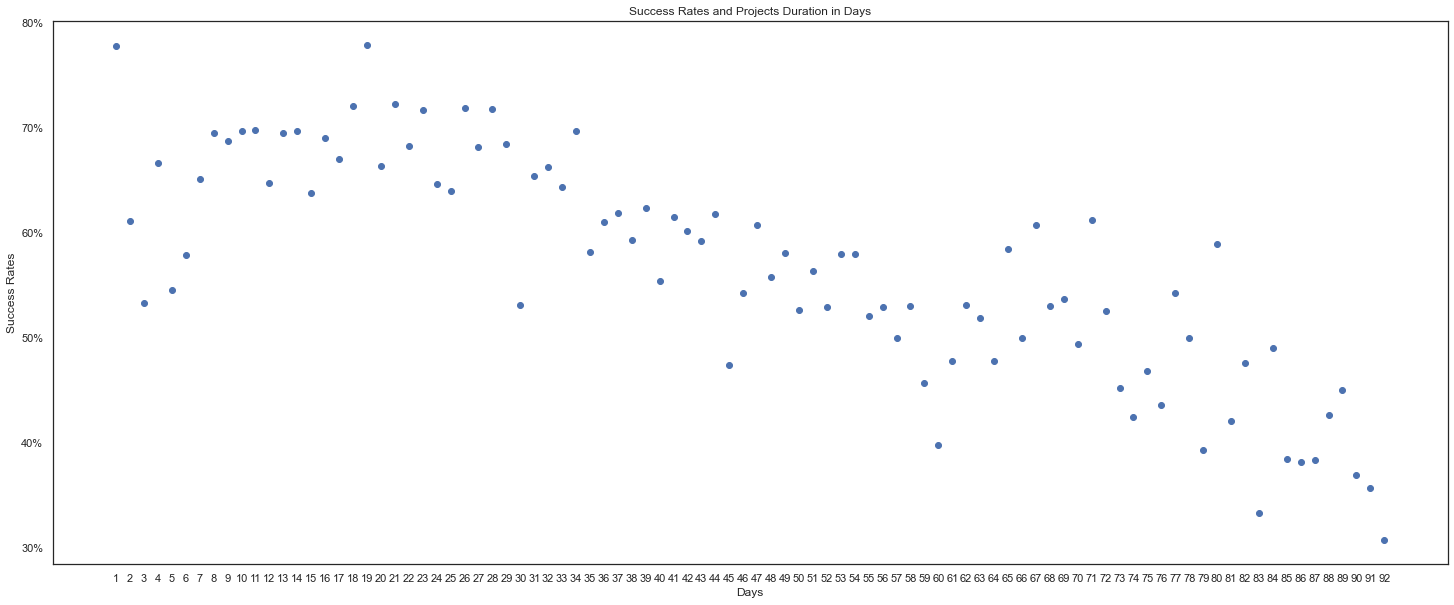

In [100]:
plt.figure(figsize=(25,10))
sns.set(style="white")
plt.scatter(labels2, dfr.success_rate)
plt.title("Success Rates and Projects Duration in Days")
plt.ylabel("Success Rates")
plt.xlabel("Days")
plt.xticks(labels2)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("Success Rates and Projects Duration in Days.png", dpi=100, bbox_inches='tight')

plt.show()

In [101]:
df_i = df[['project id', 'name', 'category', 'subcategory', 'goal', 'pledged', 'status', 'funded percentage', 'backers', 'duration', 'location']].copy()


In [102]:
df_i['funded percentage'].max()

15066.0

In [103]:
df_i.index[df_i['funded percentage'] == 15066].tolist()

[6628]

In [104]:
sel = list(np.where(df_i['funded percentage'] == 15066)[0])
df_i.iloc[sel]

,project id,name,category,subcategory,goal,pledged,status,funded percentage,backers,duration,location
6628,313013590,Y (A Generation),Film &amp; Video,Documentary,1.0,15066.0,successful,15066.0,29,49.27,"New Orleans, LA"


In [105]:
df_i[df_i['status'] == 'successful'].pledged.max()

10266845.0

In [106]:
ind = list(np.where(df_i['pledged'] == 10266845)[0])
df_i.iloc[ind]

,project id,name,category,subcategory,goal,pledged,status,funded percentage,backers,duration,location
10710,506924864,Pebble: E-Paper Watch for iPhone and Android,Design,Product Design,100000.0,10266845.0,successful,102.668457,68929,37.92,"Palo Alto, CA"


In [107]:
df_i[df_i['status'] == 'successful'].goal.median()

3000.0

Text(0.5, 0, 'Pledged')

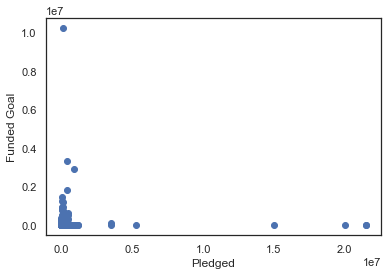

In [108]:
plt.scatter(df_i.goal, df_i.pledged)
plt.ylabel("Funded Goal")
plt.xlabel("Pledged")

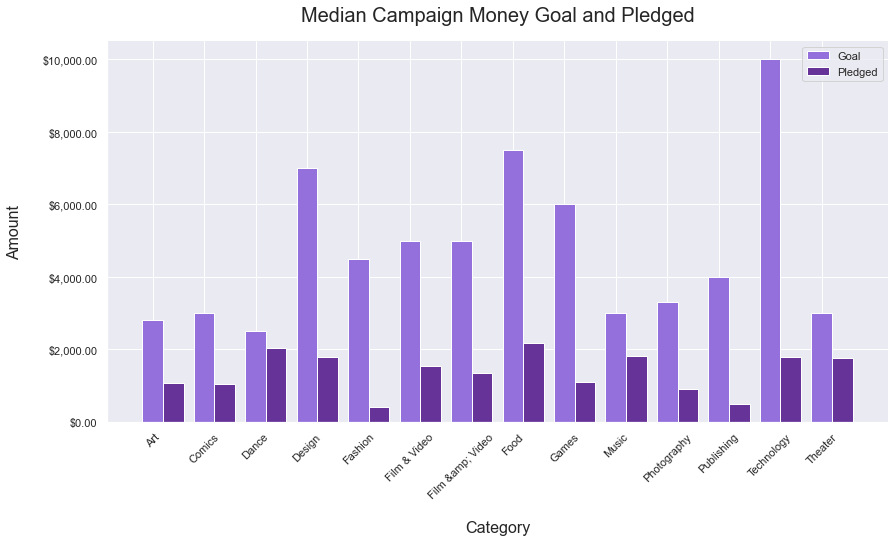

In [109]:
goal_df = df[['goal', 'pledged', 'category']]
goal_df_grouped = goal_df.groupby(by='category').median()

xs = np.array(goal_df_grouped.index)
ys_1 = goal_df_grouped['goal'].values
ys_2 = goal_df_grouped['pledged'].values

sns.set(style="darkgrid")

fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Median Campaign Money Goal and Pledged', fontsize=20, pad=20)
ax.set_xlabel('Category', fontsize=16, labelpad=20)
ax.set_ylabel('Amount', fontsize=16, labelpad=20)

plt.bar(x=[num for num in range(len(xs))], height=ys_1, color='mediumpurple', width=0.4, label='Goal', align='center')
plt.bar(x=[num + 0.4 for num in range(len(xs))], height=ys_2, color='rebeccapurple', width=0.4, label='Pledged', align='center')

ax.set_xticks(np.arange(len(xs)))
ax.set_xticklabels(xs)

y_fmt = '${x:,.2f}'
y_tick = mtick.StrMethodFormatter(y_fmt)
ax.yaxis.set_major_formatter(y_tick) 

plt.legend()
plt.xticks(rotation=45)

plt.savefig('Median Campaign Money Goal and Pledged.png', dpi=100, bbox_inches='tight')
plt.show()

In [110]:
df.goal.median()

4000.0

In [111]:
df[df['status'] == 'successful'].goal.median()

3000.0

In [112]:
df.pledged.median()

1310.0

In [113]:
df[df['status'] == 'successful'].pledged.median()

3500.0

In [114]:
df3 = df2.groupby(['month', 'status'])['status'].count().unstack()#.sort_values(by='month')
#df3

In [115]:
#df3 = df2.groupby(['month','status']).size().reset_index(name='count')
#df3

In [116]:
for i in range(0,12):
    df3['success_rate'] = df3['successful']/(df3['failed'] + df3['successful']) * 100

#df3=df3.sort_values(by='month', ascending=True)
df3

status,canceled,failed,live,successful,suspended,success_rate
month,,,,,,
Apr,NaN,2197.0,NaN,2929.0,NaN,57.140070
Aug,NaN,1378.0,1.0,1666.0,NaN,54.730618
Dec,NaN,1574.0,NaN,1725.0,NaN,52.288572
Feb,NaN,1469.0,NaN,1764.0,NaN,54.562326
Jan,NaN,1446.0,NaN,1659.0,NaN,53.429952
Jul,5.0,1336.0,712.0,1511.0,NaN,53.073411
Jun,41.0,1312.0,3216.0,1536.0,4.0,53.932584
Mar,NaN,1967.0,NaN,2592.0,NaN,56.854573
May,13.0,2664.0,NaN,3044.0,NaN,53.328662


In [552]:
#from sorted_months_weekdays import Month_Sorted_Month, Weekday_Sorted_Week

#df3['month'] = Month_Sorted_Month(df3.index)
#df3

In [553]:
total = []
success_rate = []


for i in range(0,12):
    total.append(df3.failed[i] + df3.successful[i])
    success_rate.append((df3.successful[i]/total[i])*100) 
    
#total

In [554]:
month_names = ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']
#success_rate

#lis = zip(month_names, success_rate)

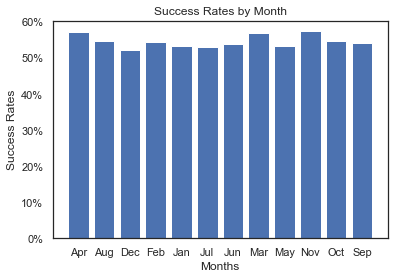

In [555]:
plt.bar(month_names, success_rate)
plt.title("Success Rates by Month")
plt.ylabel("Success Rates")
plt.xlabel("Months")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("Success Rates by Month.png", dpi=100, bbox_inches='tight')
plt.show()


In [117]:
df_d = df2.groupby(['Day', 'status'])['status'].count().unstack().sort_values(by='successful')
df_d

status,canceled,failed,live,successful,suspended
Day,,,,,
Tue,6.0,2397.0,403.0,2770.0,NaN
Wed,4.0,2425.0,406.0,2958.0,1.0
Thu,8.0,2650.0,529.0,3316.0,NaN
Sun,10.0,2854.0,724.0,3409.0,NaN
Fri,11.0,2913.0,598.0,3412.0,2.0
Mon,8.0,2714.0,551.0,3420.0,1.0
Sat,12.0,3043.0,718.0,3684.0,NaN


In [ ]:
for i in range(0,7):
    df_d['success_rate'] = df_d['successful']/(df_d['failed'] + df_d['successful']) * 100

df_d

In [ ]:
Days = ['Tue', 'Wed', 'Thu', 'Sun', 'Fri', 'Mon', 'Sat']

plt.bar(Days, df_d.success_rate)
plt.title("Success Rates by Days")
plt.ylabel("Success Rates")
plt.xlabel("Days")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("Success Rates by Days.png", dpi=100, bbox_inches='tight')
plt.show()

In [557]:
df_h = df2.groupby(['hour', 'status'])['status'].count().unstack().sort_values(by='hour')
#df_h

In [558]:
for i in range(0,24):
    df_h['success_rate'] = df_h['successful']/(df_h['failed'] + df_h['successful']) * 100
    
df_h

status,canceled,failed,live,successful,suspended,success_rate
hour,,,,,,
0,5.0,964.0,229.0,1137.0,NaN,54.117087
1,4.0,1029.0,170.0,1067.0,NaN,50.906489
2,2.0,919.0,191.0,1053.0,NaN,53.397566
3,7.0,1519.0,335.0,2523.0,NaN,62.419594
4,2.0,1368.0,196.0,2197.0,NaN,61.626928
5,NaN,869.0,108.0,1121.0,NaN,56.331658
6,3.0,700.0,117.0,999.0,NaN,58.799294
7,2.0,507.0,56.0,698.0,NaN,57.925311
8,1.0,256.0,18.0,281.0,NaN,52.327747


In [559]:
loc = range(len(df_h.success_rate))
labels1 = df_h.index

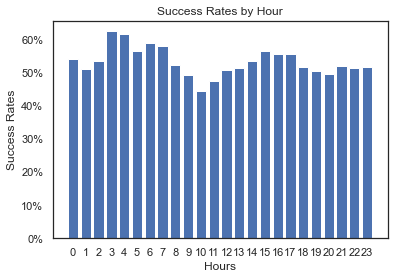

In [560]:
plt.bar(df_h.index, df_h.success_rate)
plt.title("Success Rates by Hour")
plt.ylabel("Success Rates")
plt.xlabel("Hours")
plt.xticks(loc, labels1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("Success Rates by Hour.png", dpi=100, bbox_inches='tight')
plt.show()

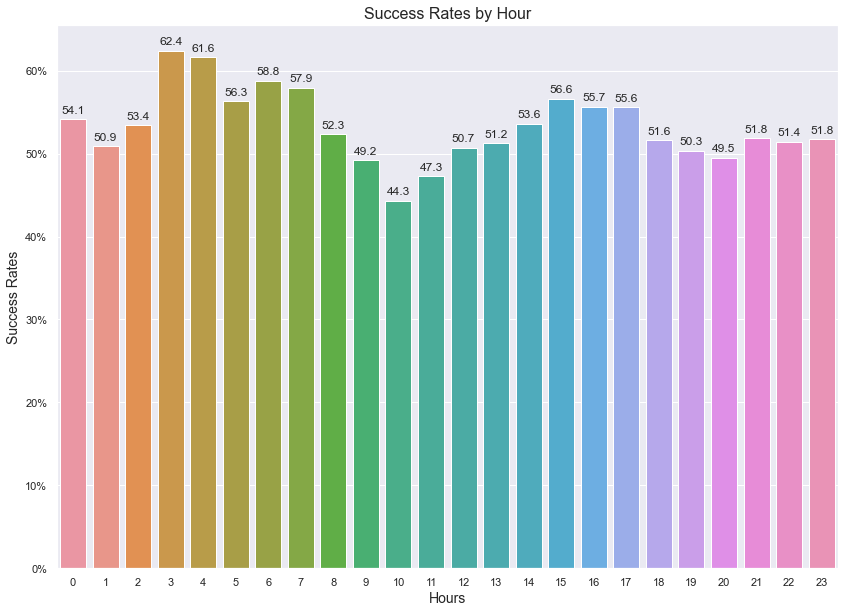

In [475]:
plt.figure(figsize=(14, 10))
#sns.set(style="darkgrid")
splot=sns.barplot(x=df_h.index, y=df_h['success_rate'], data=df_h)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title("Success Rates by Hour", fontsize=16)
plt.ylabel("Success Rates", size=14)
plt.xlabel("Hours", size=14)
plt.xticks(loc, labels1)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("Success Rates by Hour.png", dpi=100, bbox_inches='tight')
plt.show()


In [146]:
#df2.groupby(['duration'])['is_successful'].count()#.sort_values(ascending=False)

In [62]:
counts_status = df.groupby("status")["status"].count() 

total = counts_status["successful"] + counts_status["failed"] 
print("Percent Success: ", round(counts_status["successful"]/ total * 100, 2) , "%")
print("Percent Failure: ", round(counts_status["failed"]/ total * 100, 2), "%")

Percent Success:  54.73 %
Percent Failure:  45.27 %


In [63]:
counts_status

status
canceled         59
failed        18996
live           3929
successful    22969
suspended         4
Name: status, dtype: int64

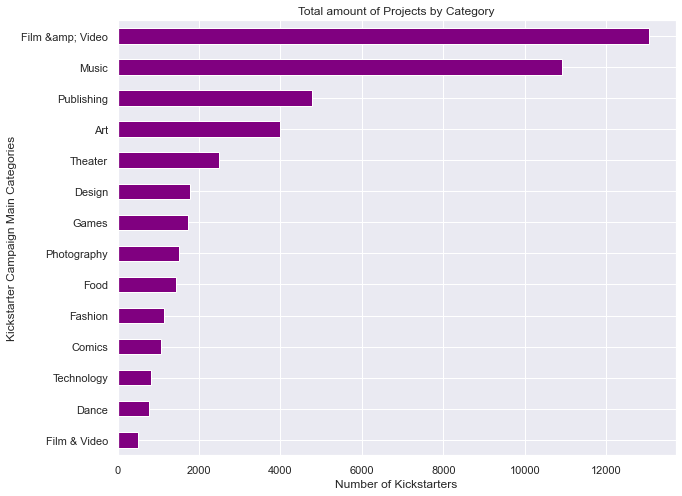

In [443]:
counts_category = df.groupby("category")["category"].count().sort_values()
counts_category.plot.barh(figsize = (10,8), color='purple')
plt.xlabel("Number of Kickstarters")
plt.ylabel("Kickstarter Campaign Main Categories")
plt.title("Total amount of Projects by Category")
plt.savefig("Total amount of Projects by Category.png", dpi=100, bbox_inches='tight')
plt.show()

In [122]:
category_total = {}
category_success = {}
listt = [category_total, category_success]

for item in listt:
    for key in df['category'].unique():
        item[key] = [0, 0]
        

for index, row in df.iterrows():
    category = row['category']
    category_total[category][0] += 1
    if row['status'] == 'successful':
        category_success[category][0] += 1
        

for item in listt:
    #print(item)
    for key in item:
        #print(key)
        item[key] = item[key][0]
        #print(item[key])



In [124]:
print("Values for pledged USD based on category:\n" + '-' * 80)
for value in category_total:
    print("{:15s}".format(value),"Success rate:\t%0.3f%% \t Total Projects:\t%.0f" % \
          ((category_success[value]/category_total[value])*100,category_total[value]))

Values for pledged USD based on category:
--------------------------------------------------------------------------------
Film & Video    Success rate:	49.398% 	 Total Projects:	498
Games           Success rate:	36.536% 	 Total Projects:	1738
Fashion         Success rate:	29.489% 	 Total Projects:	1136
Music           Success rate:	62.238% 	 Total Projects:	10913
Art             Success rate:	52.756% 	 Total Projects:	3992
Technology      Success rate:	35.635% 	 Total Projects:	811
Dance           Success rate:	69.251% 	 Total Projects:	761
Publishing      Success rate:	35.031% 	 Total Projects:	4770
Theater         Success rate:	65.891% 	 Total Projects:	2492
Comics          Success rate:	48.507% 	 Total Projects:	1072
Design          Success rate:	41.233% 	 Total Projects:	1768
Photography     Success rate:	42.602% 	 Total Projects:	1514
Food            Success rate:	45.518% 	 Total Projects:	1439
Film &amp; Video Success rate:	47.322% 	 Total Projects:	13053


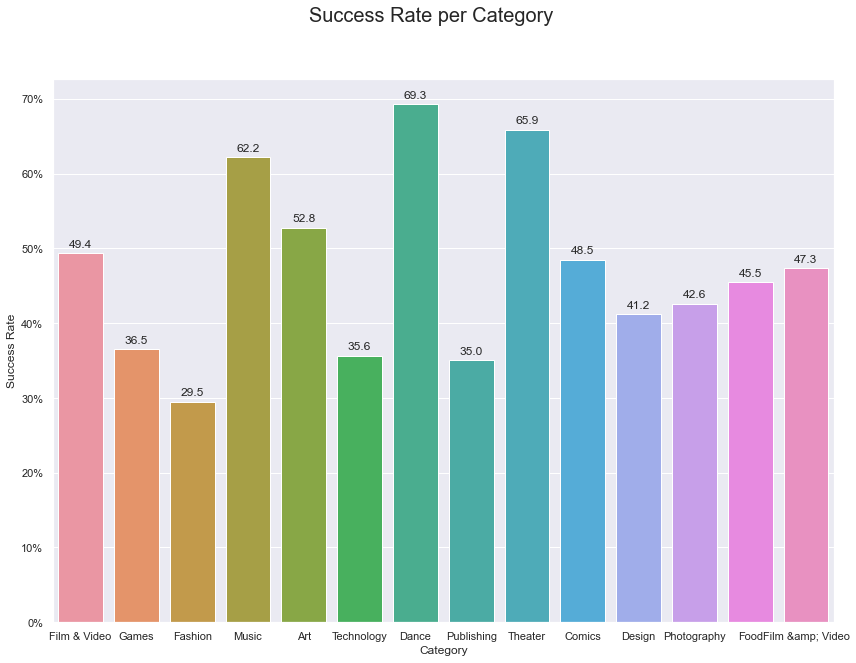

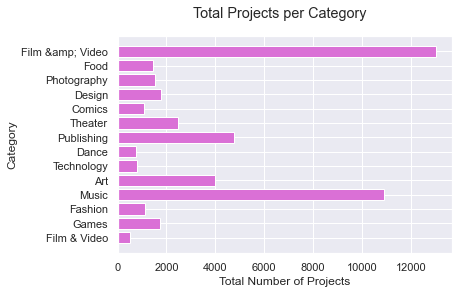

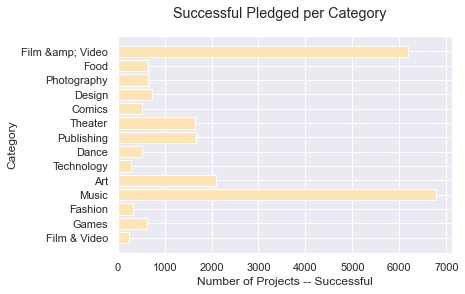

In [442]:
x  = df['category'].unique()
y1 = [] 
y2 = [] 
y3 = [] 

for e in x:
    y1.append((category_success[e]/category_total[e])*100)
    y2.append(category_total[e])
    y3.append(category_success[e])
 
plt.figure(figsize=(14, 10))
sns.set(style="darkgrid")
splot=sns.barplot(x=df['category'].unique(), y=y1)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
#plt.barh(x, y1, color='moccasin')
plt.suptitle("Success Rate per Category", fontsize=20)
plt.ylabel("Success Rate")
plt.xlabel("Category")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.savefig("Success Rate per Category.png", dpi=100, bbox_inches='tight')
plt.show()


plt.barh(x, y2, color='orchid')
plt.suptitle("Total Projects per Category")
plt.ylabel("Category")
plt.xlabel("Total Number of Projects")
plt.savefig("Total Projects per Category.png", dpi=100, bbox_inches='tight')
plt.show()

plt.barh(x, y3, color='moccasin')
plt.suptitle("Successful Pledged per Category")
plt.ylabel("Category")
plt.xlabel("Number of Projects -- Successful")
plt.savefig("Successful Pledged per Category.png", dpi=100, bbox_inches='tight')
plt.show()



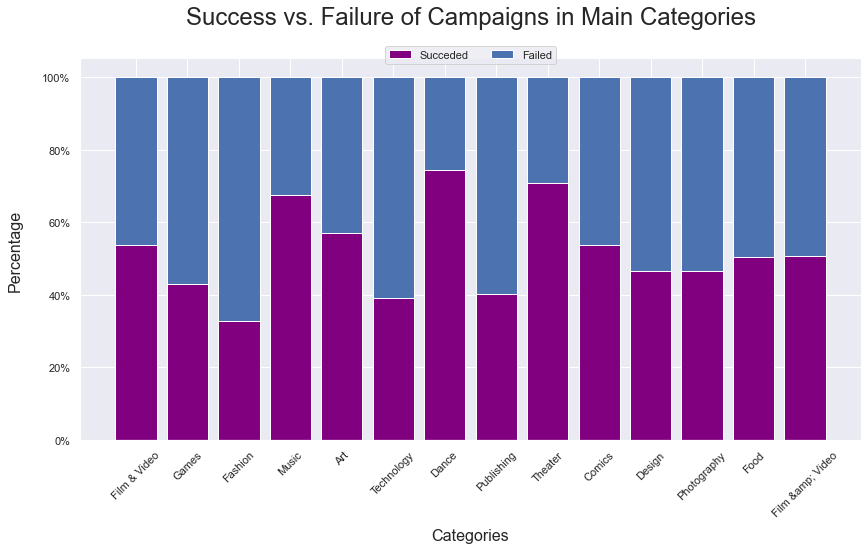

In [332]:
state_df = df[df['status'].isin(['failed', 'successful', 'canceled', 'suspended'])]
state_df['status'].replace({'failed': 'not_successful', 'canceled': 'not_successful',
                            'suspended': 'not_successful'}, inplace=True)
state_df['status'].replace({'successful': 1, 'not_successful': 0}, inplace=True)


dt = []
for value in state_df['category'].unique():
    dset = state_df[state_df['category'] == value]
    success = len(dset[dset['status'] == 1])
    failed = len(dset[dset['status'] == 0])
    
    dt.append({
        'Main_Category': value,
        'Count': failed,
        'Pct_Success': success / (success + failed),
        'Pct_Failed': failed / (success + failed)
    })
dff = pd.DataFrame(dt)


xs = dff['Main_Category']
ys_s = dff['Pct_Success']
ys_f = dff['Pct_Failed']

fig, ax = plt.subplots(figsize=(14, 7))
plt.xticks(rotation=45)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Success vs. Failure of Campaigns in Main Categories', fontsize=24, pad=35)
ax.set_xlabel('Categories', fontsize=16, labelpad=10)
ax.set_ylabel('Percentage', fontsize=16, labelpad=20)

plt.bar(x=xs, height=ys_s, label='Succeded', color='purple')
plt.bar(x=xs, height=ys_f, bottom=ys_s, label='Failed')

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True)
plt.savefig('Success vs. Failure of Campaigns in Main Categories.png', dpi=100, bbox_inches='tight')
plt.show()
 #color='#049456' '#05ce78'
    